# Case Study on Measures of Central Tendency and Dispersion

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
student = pd.read_csv('StudentsPerformance.csv')
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


## 1. Find out how many males and females participated in the test.

In [8]:
gender=student['gender'].value_counts()
gender

female    518
male      482
Name: gender, dtype: int64

- No of Female participates : 518
- No of Male participates : 482

<AxesSubplot:xlabel='gender', ylabel='count'>

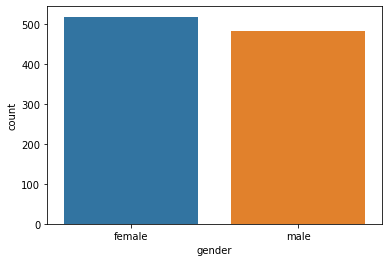

In [9]:
sns.countplot(student['gender'])

## 2. What do you think about the students' parental level of education?

In [10]:
ParentEdu=student['parental level of education'].value_counts()
ParentEdu

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
student['parental level of education'].mode()

0    some college
dtype: object

- Most of the student's Parental level of Education is 'Some College'
- Only few student's Parental level of Education is 'Master's degree'


## 3. Who scores the most on average for math, reading and writing based on¶
● Gender ● Test preparation course

In [12]:
gender=student.groupby('gender').mean()
gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


- Based on Gender
1. Most average on math : Male - 68.821577
2. Most average on reading : Female - 72.590734
3. Most average on writing : Female - 72.467181

In [13]:
test= student.groupby('test preparation course').mean()
test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


- Based on Test Preparation Course
1. Most average on math : Completed - 69.96648
2. Most average on reading : Completed - 74.175978
3. Most average on writing : Completed - 74.684358

In [16]:
GT=student.groupby(['gender','test preparation course']).mean()
GT

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

- Based on Both Gender and Test Preparation Course
1. Most average on math : Male / Completed - 72.988506
2. Most average on reading : Female / Completed - 77.375000
3. Most average on writing : Female / Completed - 78.793478

## 4. What do you think about the scoring variation for math, reading and writing based on
● Gender ● Test preparation course

Based on Gender

In [19]:
student.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


- The maths score for female has more scoring variation than the rest

Based on Test preparation course

In [21]:
student.groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


- The students whose  test preparation course as 'None' has more scoring variation for all three(Math, reading,writing)

Based on both gender and Test preparation course

In [22]:
student.groupby(['gender','test preparation course']).std()

math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

- More scoring variation for Math, Reading, Writing is evident for female students whose test preparation course as 'None' comparing to the female students who have completed test preparation course
- Based on Test preparation of each gender, the difference between the scoring variation is less for Male students compared to female students

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [24]:
student['math score'].count()

1000

 Therefore 25% top student is equal to Top 250 students are eligilable for bonus points

In [26]:
Topstudents=student.sort_values(by='math score',ascending=False)
Topstudents.iloc[0:250,0:6]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
999,male,group E,bachelor's degree,standard,completed,100
996,male,group A,some college,standard,completed,100
515,female,group E,some college,standard,none,100
517,female,group E,associate's degree,standard,none,100
516,female,group E,bachelor's degree,standard,none,100
...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77
855,male,group E,associate's degree,free/reduced,completed,77
854,male,group D,some high school,standard,completed,77
853,male,group D,associate's degree,free/reduced,none,77


Above listed are the top 25% students who are eligiable for bonus points